In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_excel('titanic3.xls')

In [4]:
df=df.drop(columns=['pclass','name','sibsp','parch','boat','body','home.dest','embarked','cabin','ticket'])

In [5]:
df.head()

,survived,sex,age,fare
0,1,female,NaN,NaN
1,1,male,0.9167,151.55
2,0,female,2.0000,151.55
3,0,male,30.0000,151.55
4,0,female,25.0000,151.55


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
survived    1309 non-null int64
sex         1309 non-null object
age         1041 non-null float64
fare        1292 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 41.0+ KB


In [7]:
df.isnull().mean()

survived    0.000000
sex         0.000000
age         0.204736
fare        0.012987
dtype: float64

In [8]:
x = df.drop(columns=['survived'])
y=df['survived']


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
x_train.shape,x_test.shape

((1047, 3), (262, 3))

In [11]:
x_train.isnull().mean()

sex     0.000000
age     0.201528
fare    0.014327
dtype: float64

In [14]:
x_train['age_99']=x_train['age'].fillna(99)
x_train['age_minus1']=x_train['age'].fillna(-1)

x_train['fare_999']=x_train['fare'].fillna(999)
x_train['fare_minus1']=x_train['fare'].fillna(-1)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [15]:
print('Original Age variable variance: ',x_train['age'].var())
print(' Age variance after 99 imputation: ',x_train['age_99'].var())
print('Age variance after -1 imputation: ',x_train['age_minus1'].var())

print('Original Fare variable variance: ',x_train['fare'].var())
print(' Fare variance after 999 imputation: ',x_train['fare_999'].var())
print(' Fare variance after -1 imputation: ',x_train['fare_minus1'].var())


Original Age variable variance:  205.51965030913723
 Age variance after 99 imputation:  945.9843113348885
Age variance after -1 imputation:  312.1820519431294
Original Fare variable variance:  2779.3344557316227
 Fare variance after 999 imputation:  15900.753265894484
 Fare variance after -1 imputation:  2756.8472574682987


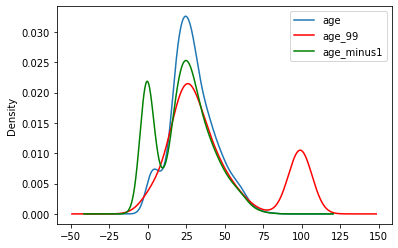

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distribution
x_train['age'].plot(kind='kde' , ax=ax)

# variable impute with the variable
x_train['age_99'].plot(kind='kde',ax=ax,color='red')

# variable imputed with the mean
x_train['age_minus1'].plot(kind='kde',ax=ax, color='green')

# add Legend
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

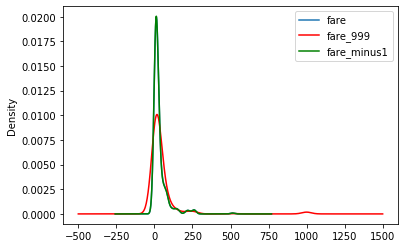

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distribution
x_train['fare'].plot(kind='kde' , ax=ax)

# variable impute with the variable
x_train['fare_999'].plot(kind='kde',ax=ax,color='red')

# variable imputed with the mean
x_train['fare_minus1'].plot(kind='kde',ax=ax, color='green')

# add Legend
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [19]:
x_train.cov()

,age,fare,age_99,age_minus,fare_999,fare_minus,age_minus1,fare_minus1
age,205.519650,152.841846,205.519650,205.519650,354.134709,142.638562,205.519650,142.638562
fare,152.841846,2779.334456,-34.560062,189.461048,2779.334456,2779.334456,189.461048,2779.334456
age_99,205.519650,-34.560062,945.984311,-176.258859,127.376747,-39.929323,-176.258859,-39.929323
age_minus,205.519650,189.461048,-176.258859,312.182052,350.299953,180.802426,312.182052,180.802426
fare_999,354.134709,2779.334456,127.376747,350.299953,15900.753266,2261.352706,350.299953,2261.352706
fare_minus,142.638562,2779.334456,-39.929323,180.802426,2261.352706,2756.847257,180.802426,2756.847257
age_minus1,205.519650,189.461048,-176.258859,312.182052,350.299953,180.802426,312.182052,180.802426
fare_minus1,142.638562,2779.334456,-39.929323,180.802426,2261.352706,2756.847257,180.802426,2756.847257


In [20]:
x_train.corr()

,age,fare,age_99,age_minus,fare_999,fare_minus,age_minus1,fare_minus1
age,1.000000,0.191945,1.000000,1.000000,0.194115,0.178647,1.000000,0.178647
fare,0.191945,1.000000,-0.021283,0.204796,1.000000,1.000000,0.204796,1.000000
age_99,1.000000,-0.021283,1.000000,-0.324343,0.032843,-0.024725,-0.324343,-0.024725
age_minus,1.000000,0.204796,-0.324343,1.000000,0.157227,0.194892,1.000000,0.194892
fare_999,0.194115,1.000000,0.032843,0.157227,1.000000,0.341549,0.157227,0.341549
fare_minus,0.178647,1.000000,-0.024725,0.194892,0.341549,1.000000,0.194892,1.000000
age_minus1,1.000000,0.204796,-0.324343,1.000000,0.157227,0.194892,1.000000,0.194892
fare_minus1,0.178647,1.000000,-0.024725,0.194892,0.341549,1.000000,0.194892,1.000000


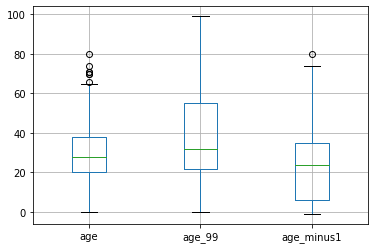

In [22]:
x_train[['age','age_99','age_minus1']].boxplot()  # major changes outliers

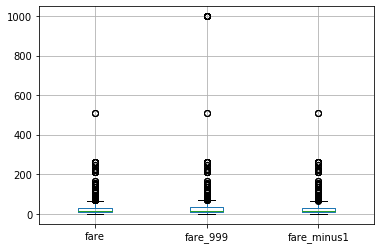

In [23]:
x_train[['fare','fare_999','fare_minus1']].boxplot() # no major change

In [24]:
# Using Sklearn

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
impute1=SimpleImputer(strategy='constant',fill_value=99)
impute2=SimpleImputer(strategy='constant',fill_value=999)

In [27]:
trf=ColumnTransformer([
    ('impute1',impute1,['age']),
    ('impute2',impute2,['fare'])

],remainder='passthrough')

In [28]:
trf.fit(x_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('impute1',
                                 SimpleImputer(add_indicator=False, copy=True,
                                               fill_value=99,
                                               missing_values=nan,
                                               strategy='constant', verbose=0),
                                 ['age']),
                                ('impute2',
                                 SimpleImputer(add_indicator=False, copy=True,
                                               fill_value=999,
                                               missing_values=nan,
                                               strategy='constant', verbose=0),
                                 ['fare'])],
                  verbose=False)

In [29]:
trf.named_transformers_['impute1'].statistics_

array([99.])

In [30]:
trf.named_transformers_['impute2'].statistics_ 

array([999.])

In [31]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [32]:
x_train

array([[25.0, 30.0, 'female'],
       [37.0, 53.1, 'male'],
       [9.0, 15.2458, 'female'],
       ...,
       [31.0, 37.0042, 'male'],
       [28.0, 10.5, 'male'],
       [24.5, 8.05, 'male']], dtype=object)